In [21]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import warnings
warnings.filterwarnings(action="ignore")
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import OneHotEncoder
from datetime import timedelta


# 데이터 모델링, SQL 응용

In [ ]:
# 1-1
taitanic=pd.read_csv("train.csv")
taitanic
taitanic.Pclass.max()
taitanic.Pclass.min()
taitanic
bins=np.linspace(taitanic.Pclass.min(), taitanic.Pclass.max(), 3)
bins
pd.get_dummies(taitanic["Pclass"], prefix="Pclass")
taitanic.info()

In [ ]:
# 1-2
ages=taitanic.Age
ages=np.array(ages)
bins = [5, 20, 30, 40, 60, 90]
labels = ["미성년자", "청년", "중년", "장년", "노년"]
cats=pd.cut(ages, bins, labels=labels)
cats.categories
cats.codes
test_age=pd.DataFrame(ages, columns=["Age"])
test_age["age_cat"]=pd.cut(ages,bins,labels=labels)
test_age

In [ ]:
# 1-3
Embarked_ohe = pd.get_dummies(taitanic.Embarked,prefix='Embarked')
pd.concat([taitanic,Embarked_ohe],axis = 1)

# 2. 타이타닉호 승객 사망자와 생존자 그룹 비율 합 1이 되게 하기

In [ ]:
# 2번
taitanic=pd.read_csv("train.csv")
bins = [5, 20, 30, 40, 60, 90]
labels = ["미성년자", "청년", "중년", "장년", "노년"]
taitanic
survive=np.where(taitanic.Survived==1,taitanic.Age,np.nan)
death=np.where(taitanic.Survived==0,taitanic.Age,np.nan)
survive_list=pd.cut(survive, bins, labels)
death_list=pd.cut(death, bins, labels)

survive_list.categories
survive_list.codes
survive_ratio=pd.value_counts(survive_list)/pd.value_counts(survive_list).sum()

death_list.categories
death_list.codes
death_ratio=pd.value_counts(death_list)/pd.value_counts(death_list).sum()

print("생존자 비율")
print(survive_ratio)
print("="*50)
print("사망자 비율")
print(death_ratio)
print("="*50)
print("생존자 비율 총합 : ", survive_ratio.sum())
print("사망자 비율 총합 : ", death_ratio.sum())

# 기초 알고리즘

In [23]:
# 1번
vec=np.array([1,1,1,1,1,1,1,1,1,1])
len(vec)

10

In [24]:
# 2번
vec[:]=0
vec[4]=1
vec

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [25]:
# 3번
vec=np.arange(10,21)
vec

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [26]:
# 4번
vec=np.sort(vec)[::-1]
vec

array([20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10])

In [27]:
# 5번
vec=np.arange(0,8).reshape(2,4)
vec

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [28]:
# 6번
vec=np.array([1,2,0,0,4,0])
vec[(vec%2==0) & (vec!=0)]

array([2, 4])

In [29]:
# 7번
id=np.eye(2)
id

array([[1., 0.],
       [0., 1.]])

In [31]:
# 8번
matrix=np.random.rand(9).reshape(3,3)
matrix

array([[0.71234847, 0.94468922, 0.38153266],
       [0.849854  , 0.06351204, 0.46582261],
       [0.87179921, 0.94911552, 0.1399739 ]])

In [32]:
# 9번
print(matrix.max())
print(matrix.min())

0.9491155204440163
0.06351204069115735


In [35]:
# 10번
print("행 평균:",matrix.mean(axis=1))
print("열 평균:",matrix.mean(axis=0))


행 평균: [0.67952345 0.45972955 0.65362954]
열 평균: [0.81133389 0.65243893 0.32910973]


# Microsoft R 서버를 활용한 빅데이터 분석

In [36]:
# 1)
import pandas as pd
import seaborn as sns
tips = sns.load_dataset("tips") 
tips=tips.astype({'sex': 'object'})
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(3), float64(2), int64(1), object(1)
memory usage: 8.8+ KB


In [37]:
# 2)
tips.loc[[1,3,5,7],'tip']='missing'
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,missing,Male,No,Sun,Dinner,3
2,21.01,3.5,Male,No,Sun,Dinner,3
3,23.68,missing,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,missing,Male,No,Sun,Dinner,4
6,8.77,2,Male,No,Sun,Dinner,2
7,26.88,missing,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [ ]:
# 3) scikitlearn에 있는 preprocessing 모듈중 표준화 및 정규화와 관련된 함수
StandardScaler(X): 평균이 0과 표준편차가 1이 되도록 변환.
RobustScaler(X): 중앙값(median)이 0, IQR(interquartile range)이 1이 되도록 변환.
MinMaxScaler(X): 최대값이 각각 1, 최소값이 0이 되도록 변환
MaxAbsScaler(X): 0을 기준으로 절대값이 가장 큰 수가 1또는 -1이 되도록 변환

In [ ]:
# 2. 표준화와 정규화 차이점 설명
1. 표준화는 데이터가 평균으로부터 얼마나 떨어져 있는지 나타내는 값인 반면
   정규화는 데이터의 상대적 크기에 대한 영향을 줄이기 위해 data의 범위를 0~1로 줄인다.
2. 데이터 표준화를 통해서 outlier를 제거하고, 데이터 정규화를 해서 크기에 대한
   영향력을 줄인 다음 분석을 한다.

In [ ]:
# 3. 데이터 분석을 위해 필요로 하는 라이브러리 및 용도 기술
1. numpy : 벡터화 연산을 통해 빠른 계산 및 분석이 가능하다. import numpy as np
2. matplotlib : 자료를 시각화해서 코드나 데이터만 보면 분석하기 어려운건 쉽게 이해할 수 있게 해준다.
3. pandas : 표(DataFrame), 열(Series)를 제공해주는 패키지이다. 표 데이터를 다루기 위해서
    import pandas as pd
    from pandas import DataFrame 을 이용
4. scikitlearn : 머신러닝을 위한 패키지로 내부에 다양한 알고리즘이 있어서 분석을 용이하게 해준다.
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import OneHotEncoder

# 파이썬 기본문법과 통계기초

In [20]:
def chn_coin(n):
    chn_list=[0,0,0,0,0]
    compare_list=[0,0,0,0,0]
    cnt=0
    chn_list[0]=int((n/500))
    chn_list[1]=int(((n%500)/100))
    chn_list[2]=int((((n%500)%100)/50))
    chn_list[3]=int(((((n%500)%100)%50)/10))
    chn_list[4]=int(((((n%500)%100)%50)%10))
    cnt=sum(chn_list)
    com_cnt=0
    com_c5=chn_list[0]
    while True:
        com_c5=com_c5-1
        if com_c5<=0:
            break
        else:
            compare_list[0]=int((n/(500*com_c5)))
            c500=compare_list[0]*500
            compare_list[1]=int((n-c500)/100)
            c100=compare_list[1]*100
            compare_list[2]=int((n-c500-c100)/50)
            c50=compare_list[2]*50
            compare_list[3]=int((n-c500-c100-c50)/10)
            c10=compare_list[3]*10
            compare_list[4]=int((n-c500-c100-c50-c10))
        com_cnt=sum(compare_list)
        if com_cnt==n%1:
            break
        if cnt>com_cnt:
            chn_list[0]=compare_list[0]
            chn_list[1]=compare_list[1]
            chn_list[2]=compare_list[2]
            chn_list[3]=compare_list[3]
            chn_list[4]=compare_list[4]
    
    print("500원:",chn_list[0],",100원:",chn_list[1],",50원:",chn_list[2],",10원:",chn_list[3],",나머지:",chn_list[4])
    
n=int(input('바꿀 돈 -->'))
chn_coin(n)

바꿀 돈 -->7777
[15, 2, 1, 2, 7]
500원: 15 ,100원: 2 ,50원: 1 ,10원: 2 ,나머지: 7


# 파이썬 패키지를 활용한 데이터 시각화

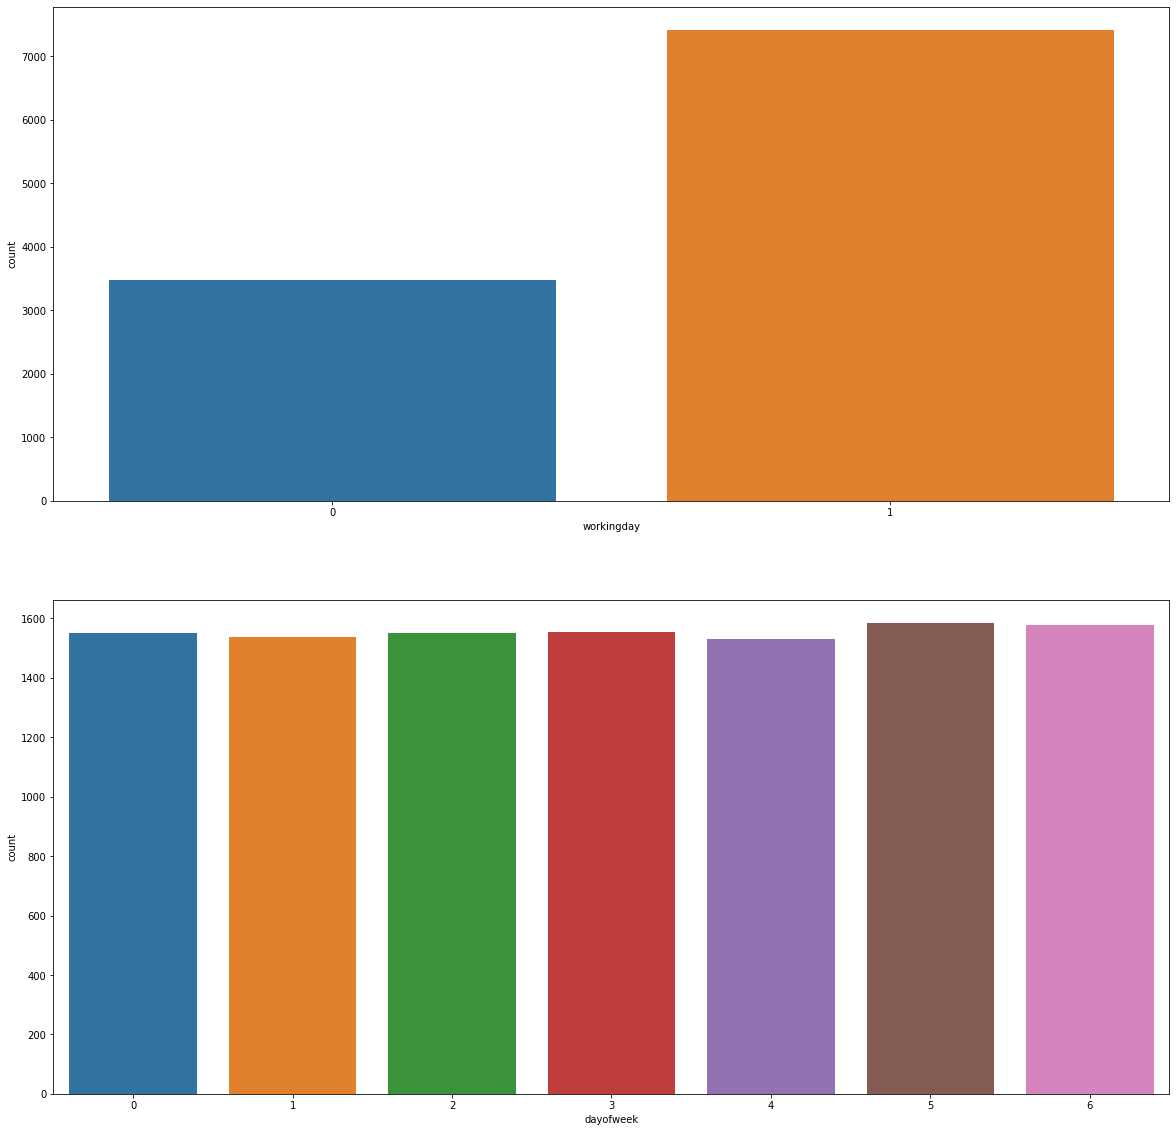

In [38]:
train=pd.read_csv("train.csv", parse_dates=['datetime'])
train['dayofweek']=train['datetime'].dt.dayofweek\

fig,axes=plt.subplots(nrows=2)
fig.set_size_inches(20,20)
sns.countplot(data=train,x='workingday',ax=axes[0])

plt.sca(axes[1])
sns.countplot(data=train,x='dayofweek',ax=axes[1])

In [ ]:
27

In [ ]:
train.head()

In [ ]:
train.workingday.value_counts()

In [41]:
train.dayofweek.value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64